<h1> Credit Card Fraud Detection </h1>
   
   ##### By Elva Ma

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
    <li><a href="#item1">Description</a>
    <li><a href="#item2">Problem</a></li>
    <li><a href="#item3">Setup</a></li>
    <li><a href="#item4">Loading Data</a></li>
    <li><a href="#item5">Exploration Data Analysis</a></li> 
    <div>
        1. Understand data <br>
        2. Check missing value<br>
        3. Check the balance of the transactions<br>
    <li><a href="#Data preprocessing">Data preprocessing</a>
    <div>
        1.	Feature Scaling<br>
        2.	Splitting the dataset into the training set and test set<br></div>
    <li><a href="#Balancing the classes">Balancing the classes</a></li>
    <div>
        1.	Random undersampling<br>
        2.	Random oversampling<br>
        3.	Synthetic Minority Over-sampling (SMOTE)<br>             
    <li><a href="#Modeling">Modeling</a></li>
    <div>
        1. Metrics Understanding <br>
        2. Logistic Regression<br>
        3. Decision Tree <br>
        4. Random Forest <br>
     <li><a href="#Conclusion">Conclusion</a></li>
</ol>
</div>
 
<hr>

 ## 1. Description

Global card fraud losses amounted to 22.8 billion US dollar in 2017 and is foreseen to continue to grow. a detection strategy needs to take into account some peculiarities of the fraud phenomenon: unbalancedness (frauds are less than 1% of all transactions), concept drift (typically due to seasonal aspects and fraudster strategies) and the big data and streaming nature. Disregarding those aspects might lead to high false alert rate, low detection accuracy or slow detection. The purpose of this analysis is to understand and help Credit card companies to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset will use in this case analysis is donwloard from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv). 

### 2. Problem
Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth the best model we need.


<h2>3. Setup</h2>

#### Importing the libraries

In [2]:
!pip install imblearn

    100% |████████████████████████████████| 174kB 21.2MB/s ta 0:00:01
    100% |████████████████████████████████| 6.6MB 5.4MB/s eta 0:00:01
    100% |████████████████████████████████| 286kB 30.9MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [25]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (0.4.3)
Requirement not upgraded as not directly required: numpy>=1.8.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from imbalanced-learn) (1.13.3)
Requirement not upgraded as not directly required: scipy>=0.13.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from imbalanced-learn) (1.0.0)
Requirement not upgraded as not directly required: scikit-learn>=0.20 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from imbalanced-learn) (0.21.2)
Requirement not upgraded as not directly required: joblib>=0.11 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from scikit-learn>=0.20->imbalanced-learn) (0.13.2)
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [16]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 4. Loading Data

In [ ]:
df = pd.read_csv(r'C:\Users\Elva\Downloads\creditcard.csv')

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 5. Exploration Data Analysis

#### Understand data

In [19]:
print("Few Entries: ")
print(df.head())
print("Dataset Shape: ", df.shape)
print("Maximum Transaction Value: ", np.max(df.Amount))
print("Minimum Transaction Value: ", np.min(df.Amount))

Few Entries: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.12

This dataset contains 284807 rows and 31 numeric columns, and all data represented as Numerical variables.

#### Check missing value

In [20]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df.isnull().any().any()

False

"True" represents the missing value, "False" means the value is present in the dataset. As result, there is no missing values in the dataset.

##### Let's represent the different between frauds and normal transactions in graphical

#### Check the balance of the transactions

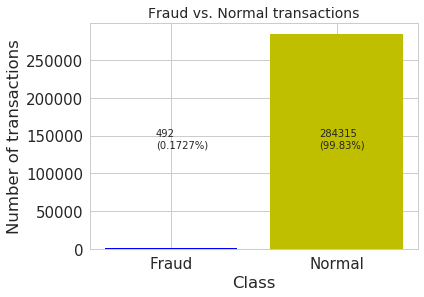

In [22]:
plt.bar(['Normal','Fraud'], df['Class'].value_counts(), color=['y','b'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.title('Fraud vs. Normal transactions', fontsize=14)
plt.show()

In [23]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [24]:
frauds.shape

(492, 31)

In [25]:
normal.shape

(284315, 31)

The dataset has only two classes as Normal and Frauds, and it is highly imbalanced with 99.83% of observations belonging to Normal transaction and only 0.17% as a fraudulent transaction. It's reasonable because the normal(non-frauds) transaction is larger than the frauds.

#### I also want to know how often fraudulent transactions occur during a certain time.

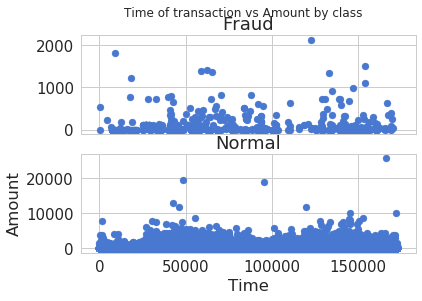

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

It looks like the time of transaction doesn't matter, it's not a good predictor for frauds. As seen above, the pattern for both Normal and Fraudulent transactions seems to be random regarding the hour of the day.

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed.

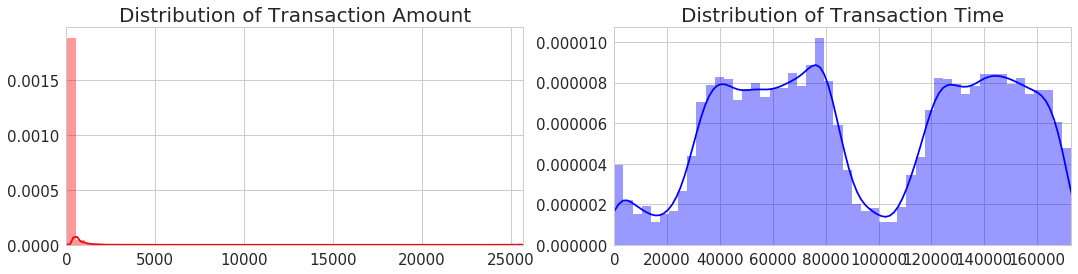

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

time_val = df['Time'].values
amount_val = df['Amount'].values

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=20)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=20)
ax[0].set_xlim([min(amount_val), max(amount_val)])

plt.show()

It would be interesting to know if there are any significant correlations between our predictors, especially with regards to our class variable. One of the most visually appealing ways to determine that is by using a heatmap

Text(0.5,1,'Heatmap of Correlation')

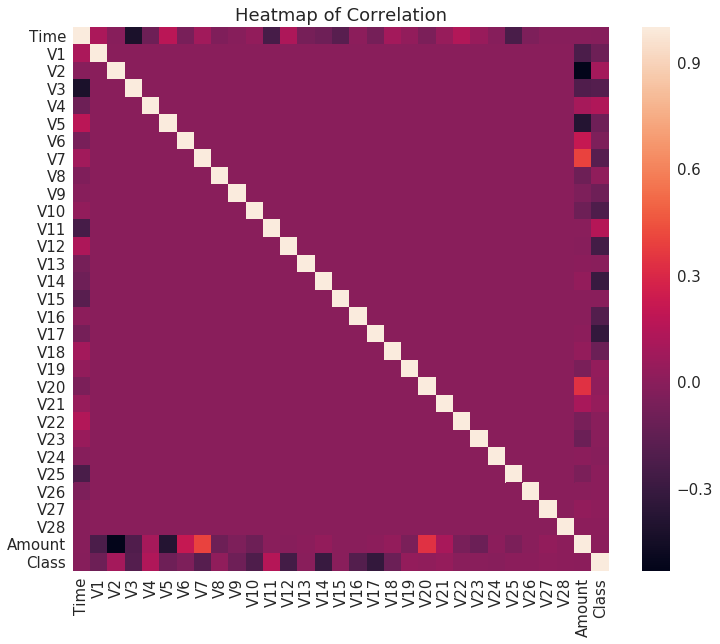

In [28]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In above heatmap we can observed that there is not that much significant correlations with variables. Becasue the high imbalance might distort the importance of certain correlations with regards to our class variable.

## 6. Data preprocessing

The dataset is all labeled data, means I can use Supervised Machine Learning to analysis the fraudulent transactions. It can be used by classifiers, adjust and compare data to find the most efficient fraud detection model.

In [29]:
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


#### Feature Scaling 

Here I will drop 'Time' colume since the time of transaction doesn't matter in this project and scale 'Amount' features

In [30]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [31]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Splitting the dataset into the training set and testing set 

In [32]:
X= data.drop(columns=['Class'])
y= data['Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

The data is splited in train and test sets maintaining the original rate of frauds to normal observations in each set by using 'stratify=y' and  'random_state=0'in the function 'train_test_split'.

## 7. Balancing the classes

#### Now I need to balance the classes after we set some observations aside to be used as a test set! Otherwise, the models might use part of the test data during the training, which will lead to overfitting. Because 99% of the original data are a normal transaction, an algorithm will always predict that transactions are normal. However, we do not want a 99% accuracy that is achieved by never labeling a transaction as fraudulent. We want to detect fraudulent transactions and label them.

There are two common methods to deal with imbalanced data problem: 
1. [Random Under-sampling](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler)- it will create a training dataset with a balanced class distribution that will force the algorithms to detect fraudulent transactions as such to achieve high performance.

2. [Random Over-sampling](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler)-Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes.

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png" width=500>

### Random Under-sampling

The reason implements "Random Under-sampling" is because it is a basic consist of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [35]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Linux-4.4.0-148-generic-x86_64-with-centos-7.6.1810-Core
Python 3.5.5 |Anaconda, Inc.| (default, May 13 2018, 21:12:35) 
[GCC 7.2.0]
NumPy 1.13.3
SciPy 1.0.0
Scikit-Learn 0.21.2


In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

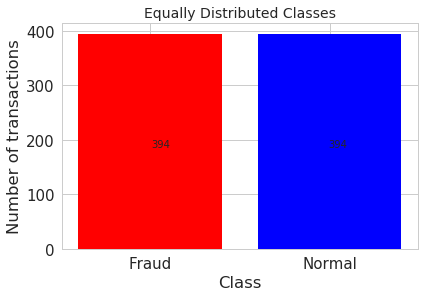

In [38]:
# Checking If classes are balanced:
from collections import Counter
plt.bar(['Normal','Fraud'], [Counter(y_rus)[0], Counter(y_rus)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rus)[0]), (0.75, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rus)[1]), (0.25, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [39]:
assert Counter(y_rus)[1] == Counter(y_train)[1] #Checking if they have the same number of fraud cases

### Random oversampling

In [40]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

Checking If classes are balanced:

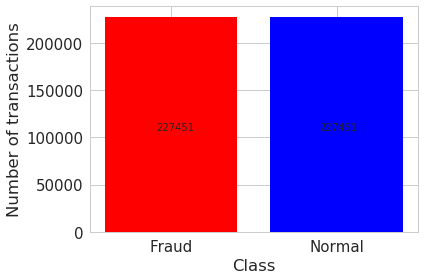

In [41]:
plt.bar(['Normal','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ros)[0]), (0.70, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ros)[1]), (0.20, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [42]:
assert Counter(y_ros)[0] == Counter(y_train)[0] #Checking if they have the same number of Normal cases

**The reality is there are drawbacks with Undersampling and Oversampling, we are either throwing away a lot of data and information. Or with oversampling, we are copying data and creating duplicates**

#### Therefore, here I am going to try Synthetic Minority Over-sampling (SMOTE). it is similar to oversampling but instead of copying the same original points randomly, the algorithm creates new points close to the original ones.

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png" width=500>

### Synthetic Minority Over-sampling (SMOTE)

In [43]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

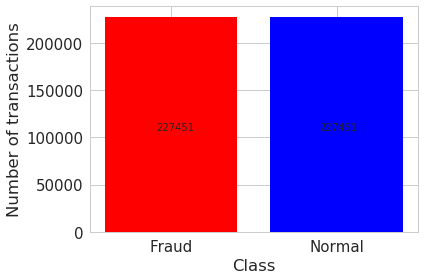

In [44]:
plt.bar(['Normal','Fraud'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_smote)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [45]:
# check before and after resample
print("Before resampling:\n{}\n".format(y_train.value_counts()))
print("After resampling:\n{}\n".format(pd.Series(y_smote).value_counts()))

Before resampling:
0    227451
1       394
Name: Class, dtype: int64

After resampling:
1    227451
0    227451
dtype: int64



#### Summary:
The result above shows that SMOTE gives more observation of the classes. Unlike the other two samplings. SMOTE does not create exact copies of observations but creates a new, synthetic sample which is quite similar to the existing observation in the minority class. We can then fit the SMOTE sampled training data into a machine learning model and make a prediction on the non-resampled test data.  

## 8. Modeling
1. Metrics Understanding
2. Logistic Regression
3. Decision Tree 
4. Random Forest 

### Metrics Understanding

Before we go to ML modeling, there are several metrics need to be understood. We need to look at **Precision, Recall and the AUC ROC curve** with highly imbalanced data. These are more reliable performance metric, used to compare different classifiers. The accuracy of a model will lose their predictive power in highly imbalanced data which will  be misleading in the case of fraud detection. 

**False negative**: predicted no fraud but actually there is fraud.

**False positive**: false alarm, predicted fraud but actually no fraud.

Different companies implementing fraud detection may focus on different aspect. For Credit card company:

-They may want to minimize the false negative, catch as many frauds as possible because fraud credit card transactions can cost a lot of money, they don't mind false positive because it just means stopping the transaction. 

-They may want to optimize for Recall, as high as possible, means out of all actual fraud cases, as many as possible are flagged, achieving a high percentage of predicted fraud cases out of all actual fraud cases.

We can optimize our model settings to get the best possible recall score to find out the fraud cases as many as possible.  We can also optimize on F1-score by reducing the number of false positives, which will provide us a nice Precision-Recall trade-off. 

However, accuracy is still a critical metric to lead us to go. Next, we will create Logistic Regression as the baseline model to compare with others to find out the best model. 

### Logistic Regression

In [46]:
# fit a logistic regression model to the data
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver="liblinear")
model_lr.fit(X_smote, y_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# obtain model predictions
predicted_lr = model_lr.predict(X_test)

In [48]:
# predict probabilities
probs_lr = model_lr.predict_proba(X_test)

In [49]:
# print the accuracy score
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted_lr)))

# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs_lr[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted_lr)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_lr)
print("Confusion matrix:\n{}\n".format(conf_mat))

Accuracy Score: 0.9755626558056248

ROC score: 0.9721819263721245

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion matrix:
[[55484  1380]
 [   12    86]]



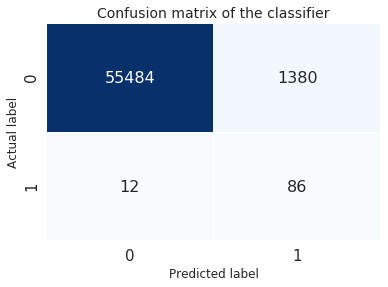

In [50]:
# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

We can see, there are 86 out of 98 fraud cases, 1380 false positive and 12 false negative. This is a good result that we want to see.

### Decision Tree

In [51]:
# define the Decision Tree model with balanced weight
model_tree = DecisionTreeClassifier(random_state=0, class_weight="balanced")

In [52]:
# fit the model to our training data
model_tree.fit(X_smote, y_smote)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [54]:
# obtain predictions from the test data 
predicted_tree = model_tree.predict(X_test)

In [55]:
# predict probabilities
probs_tree = model_tree.predict_proba(X_test)

In [56]:
# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted_tree)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs_tree[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted_tree)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted_tree)))

Accuracy Score: 0.9973491099329378

ROC score = 0.8866208167284922

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.78      0.50        98

    accuracy                           1.00     56962
   macro avg       0.69      0.89      0.75     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56735   129]
 [   22    76]]



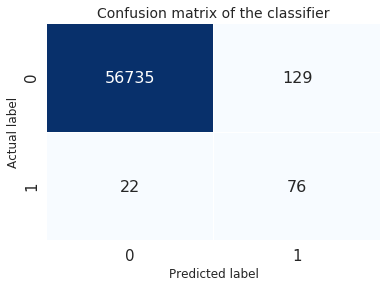

In [57]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted_tree), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

In the decision tree model, there are 76 out of 98 fraud cases, there are 129 false positive and 22 false negatives. Comparing to the logistic regression, decision tree has less both false positives and false negative which is a better model.

### Random Forest

With highly imbalanced fraud data, we need to make adjusting on the random forest model with simple use class_weights. The values y will automatically adjust weights inversely proportionally.

In [58]:
# define the model as the random forest
model_rf = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)

In [59]:
# fit the model to our training set
model_rf.fit(X_smote, y_smote)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [60]:
# obtain predictions from the test data 
predicted_rf = model_rf.predict(X_test)

In [61]:
# predict probabilities
probs_rf = model_rf.predict_proba(X_test)

In [62]:
# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted_rf)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs_tree[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted_rf)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted_rf)))

Accuracy Score: 0.999420666409185

ROC score = 0.8866208167284922

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.79      0.82        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56852    12]
 [   21    77]]



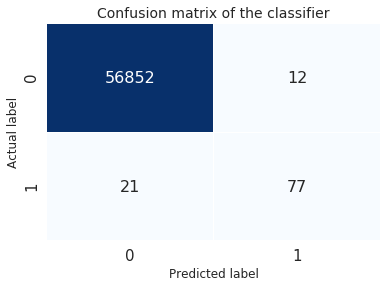

In [63]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted_rf), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

### Evaluate the random forest on the test set

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [65]:
def classification_eval(estimator, X_smote, y_smote):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_smote, y_smote
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
        print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
        print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [66]:
classification_eval(model_rf, X_smote, y_smote)

CONFUSION MATRIX
[[56852    12]
 [   21    77]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99963   0.99979   0.99971     56864
           1    0.86517   0.78571   0.82353        98

    accuracy                        0.99942     56962
   macro avg    0.93240   0.89275   0.91162     56962
weighted avg    0.99940   0.99942   0.99941     56962

SCALAR METRICS
          MCC = 0.82420
        AUPRC = 0.81275
        AUROC = 0.94191
Cohen's kappa = 0.82324
     Accuracy = 0.99942


## 9. Conclusion

#### Summary of Algorithm

|      Algorithm      | Precision | Recall | F1-score | Accuracy |   ROC   |
|---------------------|-----------|--------|----------|----------|---------|
| Logistic Regression |   0.06    | 0.88   |   0.11   |  0.9756  | 0.9722  | 
| Decision Tree       |   0.37    | 0.78   |   0.50   |  0.9973  | 0.8866  | 
| Random Forest       |   0.87    | 0.79   |   0.82   |  0.9994  | 0.8866  | 

In this project, I observed the difference between frauds and normal transactions and checked the balance of the dataset. I used Under-sampling, Over-sampling model to deal with high imbalanced data, however, there are drawbacks with Undersampling and Oversampling, so I tried SMOTE which gives more observation of the classes, then I fitted the SMOTE sampled training data into a machine learning model and make a prediction on the test data. I used supervised machine learning techniques to detect fraud cases, such as Logistic regression, decision tree, and random forest. Finaly I found out that random forest is the best model.

Reference: 
1. [Udacity-capstone-project-credit-card-fraud-prediction](https://github.com/alexandrebvd/udacity-capstone-project-credit-card-fraud-prediction/blob/master/Capstone%20Project.ipynb)
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html